<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

with open('estados-bruto.xml', 'r', encoding='utf-8') as arquivo:
    conteudo_xml = arquivo.read()

fonte = BeautifulSoup(conteudo_xml, 'lxml-xml')

In [2]:
dados_estados = []

for estado in fonte.find_all('ESTADO'):
    nome = estado.find('NOME').text
    sigla = estado.find('SIGLA').text
    regiao = estado.find('REGIAO').text
    dados_estados.append([nome, sigla, regiao])

print("estado;sigla;regiao")
for linha in dados_estados:
    print(";".join(linha))

estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
AMAZONAS;AM;NORTE
BAHIA;BA;NORDESTE
CEARA;CE;NORDESTE
DISTRITO FEDERAL;DF;CENTRO-OESTE
ESPIRITO SANTO;ES;SUDESTE
GOIAS;GO;CENTRO-OESTE
MARANHAO;MA;NORDESTE
MATO GROSSO;MT;CENTRO-OESTE
MATO GROSSO DO SUL;MS;CENTRO-OESTE
PARA;PA;NORTE
PARAIBA;PB;NORDESTE
PARANA;PR;SUL
PERNAMBUCO;PE;NORDESTE
PIAUI;PI;NORDESTE
RIO DE JANEIRO;RJ;SUDESTE
RIO GRANDE DO NORTE;RN;NORDESTE
RIO GRANDE DO SUL;RS;SUL
RONDONIA;RO;NORTE
RORAIMA;RR;NORTE
SANTA CATARINA;SC;SUL
SAO PAULO;SP;SUDESTE
SERGIPE;SE;NORDESTE
TOCANTINS;TO;NORTE
MINAS GERAIS;MG;SUDESTE


In [3]:
import csv

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

with open(NOME_ARQUIVO_DESTINO, 'w', newline='', encoding='utf-8') as csvfile:
    escritor_csv = csv.writer(csvfile, delimiter=';')

    # Escrever o cabeçalho do CSV
    escritor_csv.writerow(['estado', 'sigla', 'regiao'])

    # Escrever os dados extraídos
    escritor_csv.writerows(dados_estados)

print(f'Dados extraídos e salvos em {NOME_ARQUIVO_DESTINO}')


Dados extraídos e salvos em estados-limpo.csv


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [7]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

# Nome do arquivo fonte
NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

# Ler o arquivo CSV
cidades_df = pd.read_csv(NOME_ARQUIVO_FONTE, sep=',')

# Selecionar apenas as colunas desejadas (ajuste conforme necessário)
colunas_desejadas = ['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']
cidades_df_filtrado = cidades_df[colunas_desejadas]

# Exibir as primeiras linhas do dataframe filtrado para verificar a seleção
cidades_df_filtrado.columns = ['estado', 'cidade', 'pib', 'populacao', 'pib_percapita']

# Salvar o dataframe filtrado em um novo arquivo CSV
cidades_df_filtrado.to_csv('cidades-limpo.csv', sep=';', index=False)

# Exibir as primeiras linhas do dataframe filtrado para verificar a seleção
print(cidades_df_filtrado.head())

              estado     cidade           pib  populacao  pib_percapita
0              BAHIA   Tremedal  5.788399e+04      18433    3140.239990
1  RIO GRANDE DO SUL     Turuçu  4.572388e+04       4000   11430.969727
2     ESPIRITO SANTO    Vitória  1.978263e+07     320156   61790.589844
3       MINAS GERAIS  Jacutinga  2.478160e+05      21424   11567.209961
4              PIAUÍ    Nazária  2.095138e+04       7895    2653.750000


In [ ]:
# visualize os resultados

# continue o codigo aqui

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [36]:
import pandas as pd
import unicodedata

def remover_acentos(texto):
    return ''.join(c for c in unicodedata.normalize('NFKD', texto) if unicodedata.category(c) != 'Mn')

ARQUIVO_ESTADOS = 'estados-limpo.csv'
ARQUIVO_CIDADES = 'cidades-limpo.csv'

estados_df = pd.read_csv(ARQUIVO_ESTADOS, sep=';')
cidades_df = pd.read_csv(ARQUIVO_CIDADES, sep=';')

estados_df['estado'] = estados_df['estado'].apply(remover_acentos)
cidades_df['estado'] = cidades_df['estado'].apply(remover_acentos)

brasil_df = pd.merge(estados_df, cidades_df, on='estado', how='inner')

brasil_df.to_csv('brasil.csv', sep=';', index=False)

print(brasil_df.head())

  estado sigla regiao                cidade            pib  populacao  \
0   ACRE    AC  NORTE  Marechal Thaumaturgo  109181.867188      14275   
1   ACRE    AC  NORTE      Senador Guiomard  217153.859375      19697   
2   ACRE    AC  NORTE          Assis Brasil   48347.300781       5662   
3   ACRE    AC  NORTE        Epitaciolândia  129641.093750      14224   
4   ACRE    AC  NORTE         Manoel Urbano   61478.730469       7505   

   pib_percapita  
0    7648.470215  
1   11024.719727  
2    8538.910156  
3    9114.250000  
4    8191.700195  


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [37]:
import pandas as pd

# Nome do arquivo resultante
ARQUIVO_BRASIL = 'brasil.csv'

# Ler o arquivo CSV resultante
brasil_df = pd.read_csv(ARQUIVO_BRASIL, sep=';')

# Exibir as primeiras linhas do dataframe para verificar a leitura
print(brasil_df.head())

  estado sigla regiao                cidade            pib  populacao  \
0   ACRE    AC  NORTE  Marechal Thaumaturgo  109181.867188      14275   
1   ACRE    AC  NORTE      Senador Guiomard  217153.859375      19697   
2   ACRE    AC  NORTE          Assis Brasil   48347.300781       5662   
3   ACRE    AC  NORTE        Epitaciolândia  129641.093750      14224   
4   ACRE    AC  NORTE         Manoel Urbano   61478.730469       7505   

   pib_percapita  
0    7648.470215  
1   11024.719727  
2    8538.910156  
3    9114.250000  
4    8191.700195  


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [38]:
cidades_mais_populosas = brasil_df.sort_values(by='populacao', ascending=False).head(10)

print(cidades_mais_populosas[['cidade', 'populacao']])

              cidade  populacao
4414       São Paulo   11037593
2755  Rio de Janeiro    6186710
246         Salvador    2998056
803         Brasília    2606885
767        Fortaleza    2505552
5458  Belo Horizonte    2452617
2061        Curitiba    1851215
142           Manaus    1738641
2454          Recife    1561659
1692           Belém    1437600


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [44]:
nordeste_df = brasil_df[brasil_df['regiao'] == 'NORDESTE']

nordeste_df = nordeste_df.sort_values(by='pib_percapita')

menor_pib_per_capita = nordeste_df[['sigla', 'cidade', 'pib_percapita']].head(5)

print(menor_pib_per_capita)

     sigla              cidade  pib_percapita
1320    MA  São Vicente Ferrer    1929.969971
1215    MA             Cajapió    2203.830078
271     BA             Lamarão    2327.149902
2520    PI       Dom Inocêncio    2358.239990
1340    MA            Timbiras    2368.159912


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [47]:
sao_paulo_pib_df = brasil_df[brasil_df['estado'] == 'SAO PAULO']

sao_paulo_pib_df = sao_paulo_pib_df.sort_values(by='pib', ascending=False)

maior_pib_sp = sao_paulo_pib_df[['sigla', 'cidade', 'pib']].head(15)

print(maior_pib_sp)

     sigla                 cidade          pib
4414    SP              São Paulo  389317152.0
4366    SP              Guarulhos   32473828.0
4483    SP               Campinas   31654720.0
4248    SP                 Osasco   31616452.0
3951    SP  São Bernardo do Campo   28935768.0
4487    SP                Barueri   26908070.0
3908    SP                 Santos   22546134.0
4135    SP    São José dos Campos   22018042.0
4155    SP                Jundiaí   16585137.0
3957    SP            Santo André   14709603.0
3894    SP         Ribeirão Preto   14688064.0
4295    SP               Sorocaba   14182597.0
4179    SP                Diadema    9969819.0
4477    SP             Piracicaba    9601211.0
4140    SP     São Caetano do Sul    8920202.0


 - Qual é o PIB do estado de Santa Catarina?

In [52]:
# código para responder a pergunta

sc_pib_df = brasil_df[brasil_df['estado'] == 'SANTA CATARINA']

sc_pib_df = sc_pib_df['pib'].sum()

print(f"O PIB do estado de Santa Catarina é: R$ {sc_pib_df}")

O PIB do estado de Santa Catarina é: R$ 129806256.75195317


 - Qual é o população da região sul?

In [53]:
# código para responder a pergunta

popsul_df = brasil_df[brasil_df['regiao'] == 'SUL']

popsul_df = popsul_df['populacao'].sum()

print(f"A população do SUl é {popsul_df}")

A população do SUl é 27719118


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [56]:
# código para responder a pergunta

pib_medio_ms_df = brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']
pib_medio_ms_df = pib_medio_ms_df['pib_percapita'].mean()

print(f"O PIB per capita médio de Mato Grosso do SUl é {pib_medio_ms_df:.2f}")

O PIB médio de Mato Grosso do SUl é 14458.90


 - Qual é a população do Brasil?

In [58]:
# código para respgunta
populacao_total = brasil_df['populacao'].sum()

print(f"A população total do Brasil é de {populacao_total}")

A população total do Brasil é: 191501418


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

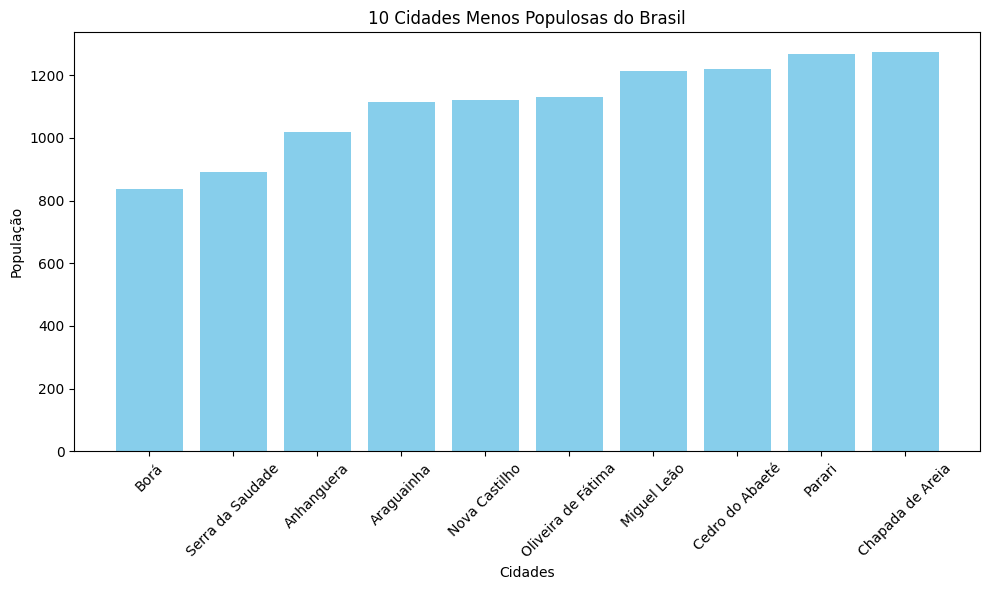

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

menores_cidades = brasil_df.sort_values(by='populacao').head(10)

plt.figure(figsize=(10, 6))
plt.bar(menores_cidades['cidade'], menores_cidades['populacao'], color='skyblue')
plt.xlabel('Cidades')
plt.ylabel('População')
plt.title('10 Cidades Menos Populosas do Brasil')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

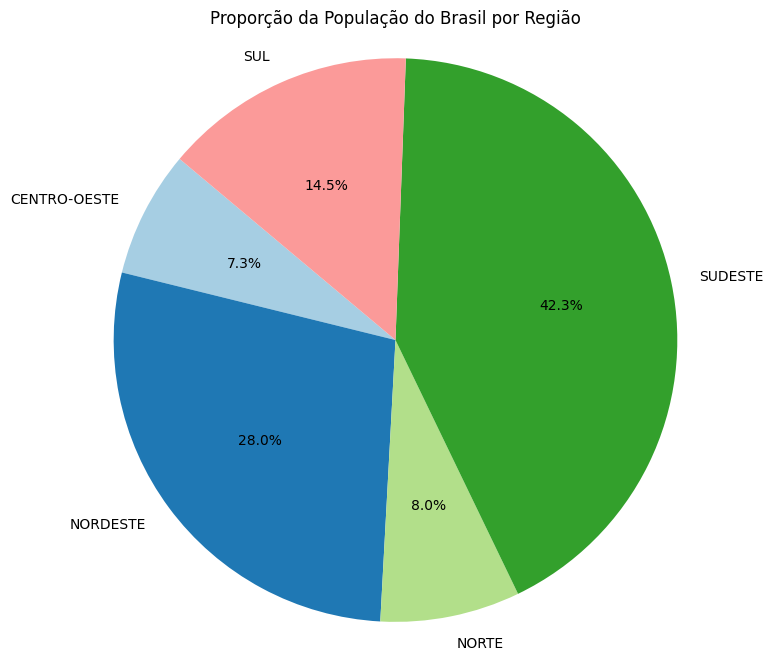

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que o dataframe brasil_df já esteja carregado
# Agrupar os dados por região e somar as populações
populacao_por_regiao = brasil_df.groupby('regiao')['populacao'].sum()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(populacao_por_regiao, labels=populacao_por_regiao.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporção da População do Brasil por Região')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Mostrar o gráfico
plt.show()